In [1]:
!pip install -U tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21500 sha256=3ddefb7ee4c0066173e8bd905ccb742b5f1fd12baff58da8fd9a9c71f2260059
  Stored in directory: C:\Users\D899~1\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f316b12fbde9
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78598 sha256=97922f0b18a2b612c86b242ada45915180f65f4aba47f30dff021d940f33844f
  Stored in directory: C:\Users\D899~1\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.6.0-cp37-none-any.whl size=77585 sha256=c0a31f08e1e250fc2820c833e246b4cbe4f9b5baa009f3ea12a8cc4514a40eb1
  Stored in directory: C:\Users\D899~1\AppData\Local\pip\Cache\wheels\9e\3d\a2\1bec8bb7db80ab3216dbc33092bb7ccd0debfb8ba42b5668d5
Successfully built promise dill googleapis-common-protos


In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.0.0


In [34]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [35]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [36]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


In [37]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /=  255
    return images, labels

def mirror(images, labels):
    return tf.image.flip_up_down(images), labels
    

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

<function matplotlib.pyplot.show(*args, **kw)>

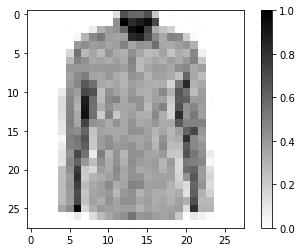

In [38]:
for image, label in test_dataset.take(1):
    
    image = image.numpy().reshape((28, 28))
    
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show

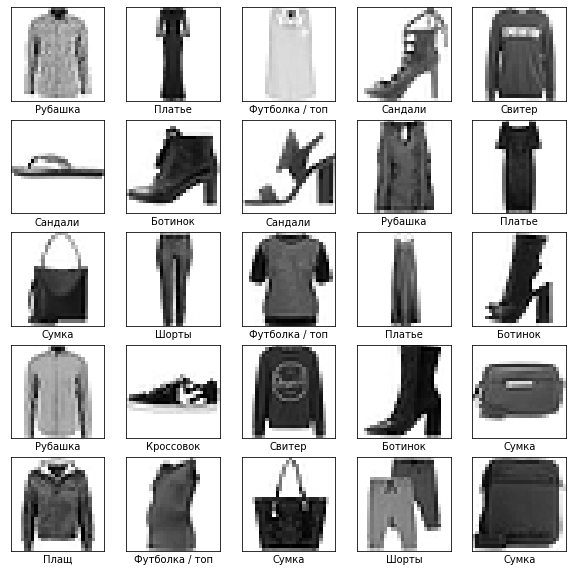

In [39]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation=tf.nn.relu,
                          input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2), strides = 2),
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [42]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [43]:
%%time
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
 150/1875 [=>............................] - ETA: 7:08:41 - loss: 2.3186 - accuracy: 0.0000e+0 - ETA: 3:35:37 - loss: 2.3011 - accuracy: 0.0781    - ETA: 2:24:29 - loss: 2.2775 - accuracy: 0.093 - ETA: 1:48:54 - loss: 2.2436 - accuracy: 0.156 - ETA: 1:27:33 - loss: 2.2113 - accuracy: 0.193 - ETA: 1:13:19 - loss: 2.1833 - accuracy: 0.213 - ETA: 1:03:10 - loss: 2.1525 - accuracy: 0.236 - ETA: 55:37 - loss: 2.1087 - accuracy: 0.2617  - ETA: 49:42 - loss: 2.0677 - accuracy: 0.291 - ETA: 44:59 - loss: 2.0462 - accuracy: 0.296 - ETA: 41:05 - loss: 2.0118 - accuracy: 0.312 - ETA: 37:49 - loss: 1.9561 - accuracy: 0.330 - ETA: 35:05 - loss: 1.9130 - accuracy: 0.341 - ETA: 32:44 - loss: 1.8640 - accuracy: 0.357 - ETA: 30:43 - loss: 1.8129 - accuracy: 0.377 - ETA: 28:56 - loss: 1.7912 - accuracy: 0.375 - ETA: 27:21 - loss: 1.7347 - accuracy: 0.389 - ETA: 25:57 - loss: 1.7102 - accuracy: 0.402 - ETA: 24:42 - loss: 1.6948 - accuracy: 0.403 - ETA: 23:34 - loss: 1.6672 

KeyboardInterrupt: 

In [44]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
test_accuracy

313/313 [==============================] - ETA: 52s - loss: 0.6247 - accuracy: 0.812 - ETA: 22s - loss: 0.5767 - accuracy: 0.770 - ETA: 21s - loss: 0.5587 - accuracy: 0.781 - ETA: 17s - loss: 0.5286 - accuracy: 0.802 - ETA: 16s - loss: 0.4914 - accuracy: 0.817 - ETA: 15s - loss: 0.5377 - accuracy: 0.798 - ETA: 14s - loss: 0.5315 - accuracy: 0.798 - ETA: 14s - loss: 0.5224 - accuracy: 0.796 - ETA: 13s - loss: 0.5031 - accuracy: 0.805 - ETA: 13s - loss: 0.5002 - accuracy: 0.800 - ETA: 12s - loss: 0.5029 - accuracy: 0.805 - ETA: 12s - loss: 0.5060 - accuracy: 0.805 - ETA: 12s - loss: 0.5171 - accuracy: 0.800 - ETA: 11s - loss: 0.5235 - accuracy: 0.801 - ETA: 11s - loss: 0.5303 - accuracy: 0.801 - ETA: 11s - loss: 0.5454 - accuracy: 0.792 - ETA: 10s - loss: 0.5535 - accuracy: 0.788 - ETA: 10s - loss: 0.5482 - accuracy: 0.793 - ETA: 10s - loss: 0.5609 - accuracy: 0.784 - ETA: 10s - loss: 0.5690 - accuracy: 0.781 - ETA: 10s - loss: 0.5608 - accuracy: 0.784 - ETA: 9s - loss: 0.5589 - accuracy

0.7967

In [45]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [46]:
predictions.shape

(32, 10)

In [47]:
predictions[0]

array([4.2535095e-03, 2.9246742e-04, 1.0938659e-01, 6.7899232e-03,
       1.7779067e-01, 2.0756586e-04, 6.9698602e-01, 7.4411524e-05,
       4.0644812e-03, 1.5428074e-04], dtype=float32)

In [48]:
np.argmax(predictions[0])

6

In [49]:
test_labels[0]

6

In [50]:
def plot_image(i, predictions_array, true_label, images):
  predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

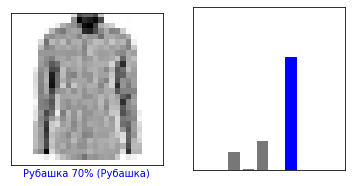

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

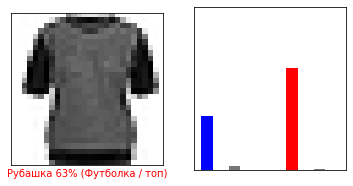

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

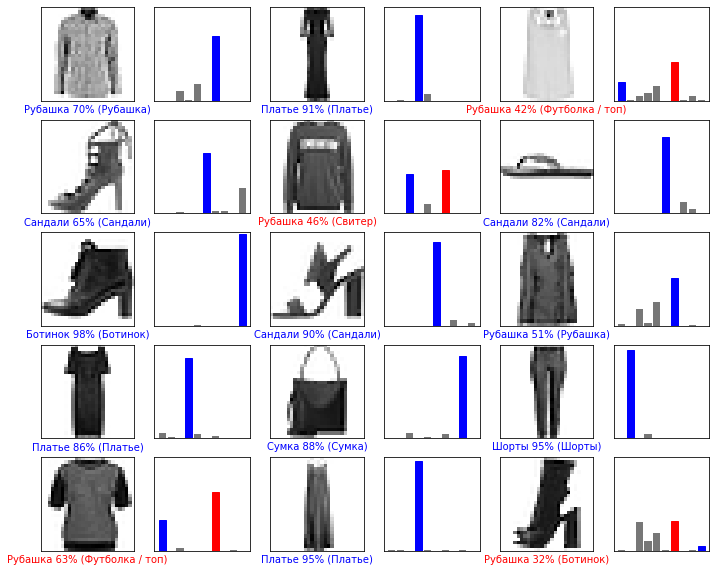

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions, test_labels)

In [54]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [55]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [56]:
predictions_single = model.predict(img)
print(predictions_single)

[[4.25350852e-03 2.92467477e-04 1.09386615e-01 6.78992458e-03
  1.77790835e-01 2.07565812e-04 6.96985841e-01 7.44114295e-05
  4.06448217e-03 1.54280700e-04]]


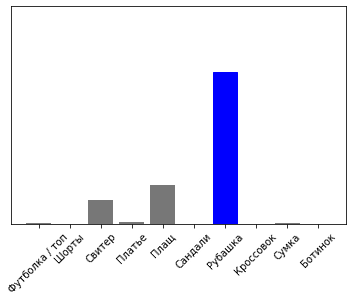

In [57]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [58]:
np.argmax(predictions_single[0])

6